In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

import itertools
from sklearn import metrics
from IPython.display import display, HTML

dir='/Users/shuya/Documents/DS/MachineLearning/Statistical Learning/Data/'


import warnings
warnings.filterwarnings('ignore')

## Question 6


In this exercise, you will further analyze the Wage data set considered
throughout this chapter.

(a) Perform polynomial regression to predict wage using age. Use
cross-validation to select the optimal degree d for the polynomial.
What degree was chosen, and how does this compare to
the results of hypothesis testing using ANOVA? Make a plot of
the resulting polynomial fit to the data.

In [6]:
wage = pd.read_csv(dir + 'wage.csv', index_col = 'Unnamed: 0')
wage = wage.dropna(axis = 0)
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [9]:
poly = PolynomialFeatures(2).fit_transform(wage[['age']]) #this also include interaction features

In [25]:
X = wage[['age']]
y = wage[['wage']]

mse = []
for k in np.linspace(1,8,7,dtype='int'):
    poly = PolynomialFeatures(k).fit_transform(wage[['age']]) #this also include interaction features
    mse.append([k, np.mean(cross_val_score(linear_model.LinearRegression(),poly, wage['wage'], cv=5))])


mse_df = pd.DataFrame(mse,columns=['k','mse'])
mse_df

,k,mse
0,1,0.037105
1,2,0.080247
2,3,0.083125
3,4,0.083553
4,5,0.082581
5,6,0.082845
6,8,0.079973


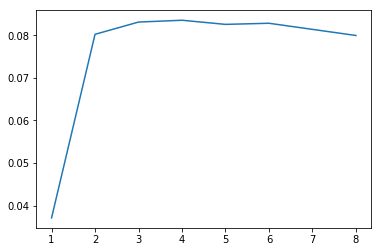

In [29]:
#sns.lineplot(mse_df['k'], mse_df['mse'])
plt.plot(mse_df['k'], mse_df['mse'])
plt.show()

## Question 7

The Wage data set contains a number of other features not explored
in this chapter, such as marital status (maritl), job class (jobclass),
and others. Explore the relationships between some of these other
predictors and wage, and use non-linear fitting techniques in order to
fit flexible models to the data. Create plots of the results obtained,
and write a summary of your findings.

In [30]:
categorical_vars = wage.select_dtypes(include = 'object')

['1. Never Married' '2. Married' '3. Widowed' '4. Divorced' '5. Separated']
['1. White' '2. Black' '3. Asian' '4. Other']
['1. < HS Grad' '2. HS Grad' '3. Some College' '4. College Grad'
 '5. Advanced Degree']
['2. Middle Atlantic']
['1. Industrial' '2. Information']
['1. <=Good' '2. >=Very Good']
['1. Yes' '2. No']


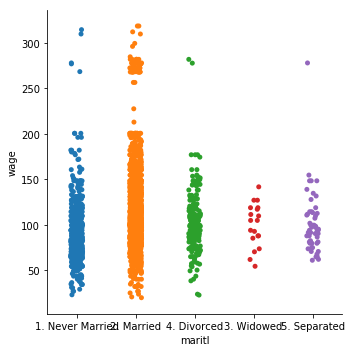

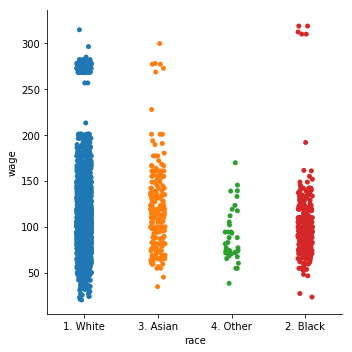

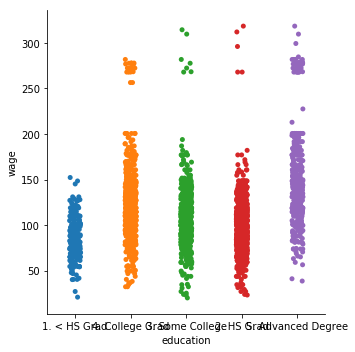

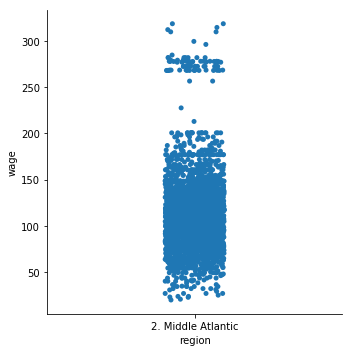

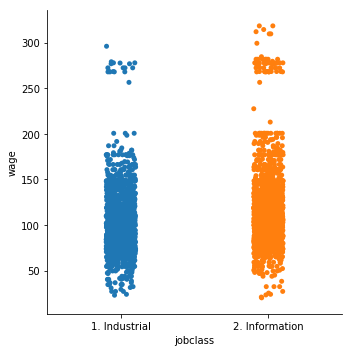

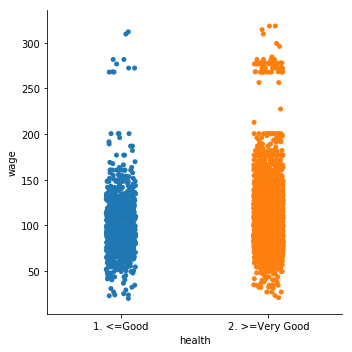

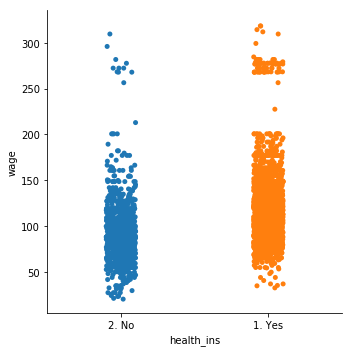

In [31]:
for var in categorical_vars:
    print(np.sort(wage[var].unique()))
    sns.catplot(x=var, y='wage', data=wage)

In [33]:
wage = wage.drop(['region'],axis=1)

In [38]:
model = smf.ols('wage ~ year + education + cr(age, df=4) + C(maritl) + C(race) + C(jobclass) + C(health) + C(health_ins)',data=wage)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     89.09
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          3.24e-262
Time:                        16:17:25   Log-Likelihood:                -14804.
No. Observations:                3000   AIC:                         2.965e+04
Df Residuals:                    2981   BIC:                         2.976e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -2004.0421    489.986     -4.090      0.000   -2964.788   -1043.297
education[T.2. HS Grad]             7.6164      2.353      3.237      0.001       3.003      12.230
education[T.3. Some College]       18.1391      2.502      7.249      0.000      13.233      23.046
education[T.4. College Grad]       30.6367      2.531     12.103      0.000      25.673      35.600
education[T.5. Advanced Degree]    53.1928      2.793     19.046      0.000      47.717      58.669
C(maritl)[T.2. Married]            13.3047      1.809      7.355      0.000       9.758      16.852
C(maritl)[T.3. Widowed]             0.3992      7.959      0.050      0.960     -15.207      16.005
C(maritl)[T.4. Divorced]            0.0151      2.928      0.005      0.996      -5.726       5.756
C(maritl)[T.5. Separated]           7.2503      4.849      1.495      0.135      -2.258      16.759
C(race)[T.2. Black]                -4.7620      2.132     -2.233      0.026      -8.943      -0.581
C(race)[T.3. Asian]                -2.7879      2.585     -1.079      0.281      -7.856       2.281
C(race)[T.4. Other]                -5.6528      5.625     -1.005      0.315     -16.683       5.377
C(jobclass)[T.2. Information]       3.4833      1.315      2.650      0.008       0.906       6.061
C(health)[T.2. >=Very Good]         6.2580      1.411      4.435      0.000       3.491       9.024
C(health_ins)[T.2. No]            -16.4061      1.403    -11.697      0.000     -19.156     -13.656
year                                1.2857      0.305      4.211      0.000       0.687       1.884
cr(age, df=4)[0]                 -516.0987    122.531     -4.212      0.000    -756.353    -275.845
cr(age, df=4)[1]                 -491.7289    122.454     -4.016      0.000    -731.832    -251.626
cr(age, df=4)[2]                 -491.7783    122.565     -4.012      0.000    -732.099    -251.458
cr(age, df=4)[3]                 -504.4363    122.649     -4.113      0.000    -744.922    -263.951
==============================================================================
Omnibus:                     1177.629   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7305.923
Skew:                           1.741   Prob(JB):                         0.00
Kurtosis:                       9.806   Cond. No.                     9.84e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
pred = res.predict(wage.drop(['wage','logwage'],axis=1))
metrics.mean_squared_error(pred.values,wage['wage'].values)**0.5

33.64269849955734

## Question  8

Fit some of the non-linear models investigated in this chapter to the
Auto data set. Is there evidence for non-linear relationships in this
data set? Create some informative plots to justify your answer.

In [59]:
auto = pd.read_csv(dir+'auto.csv', index_col='Unnamed: 0')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


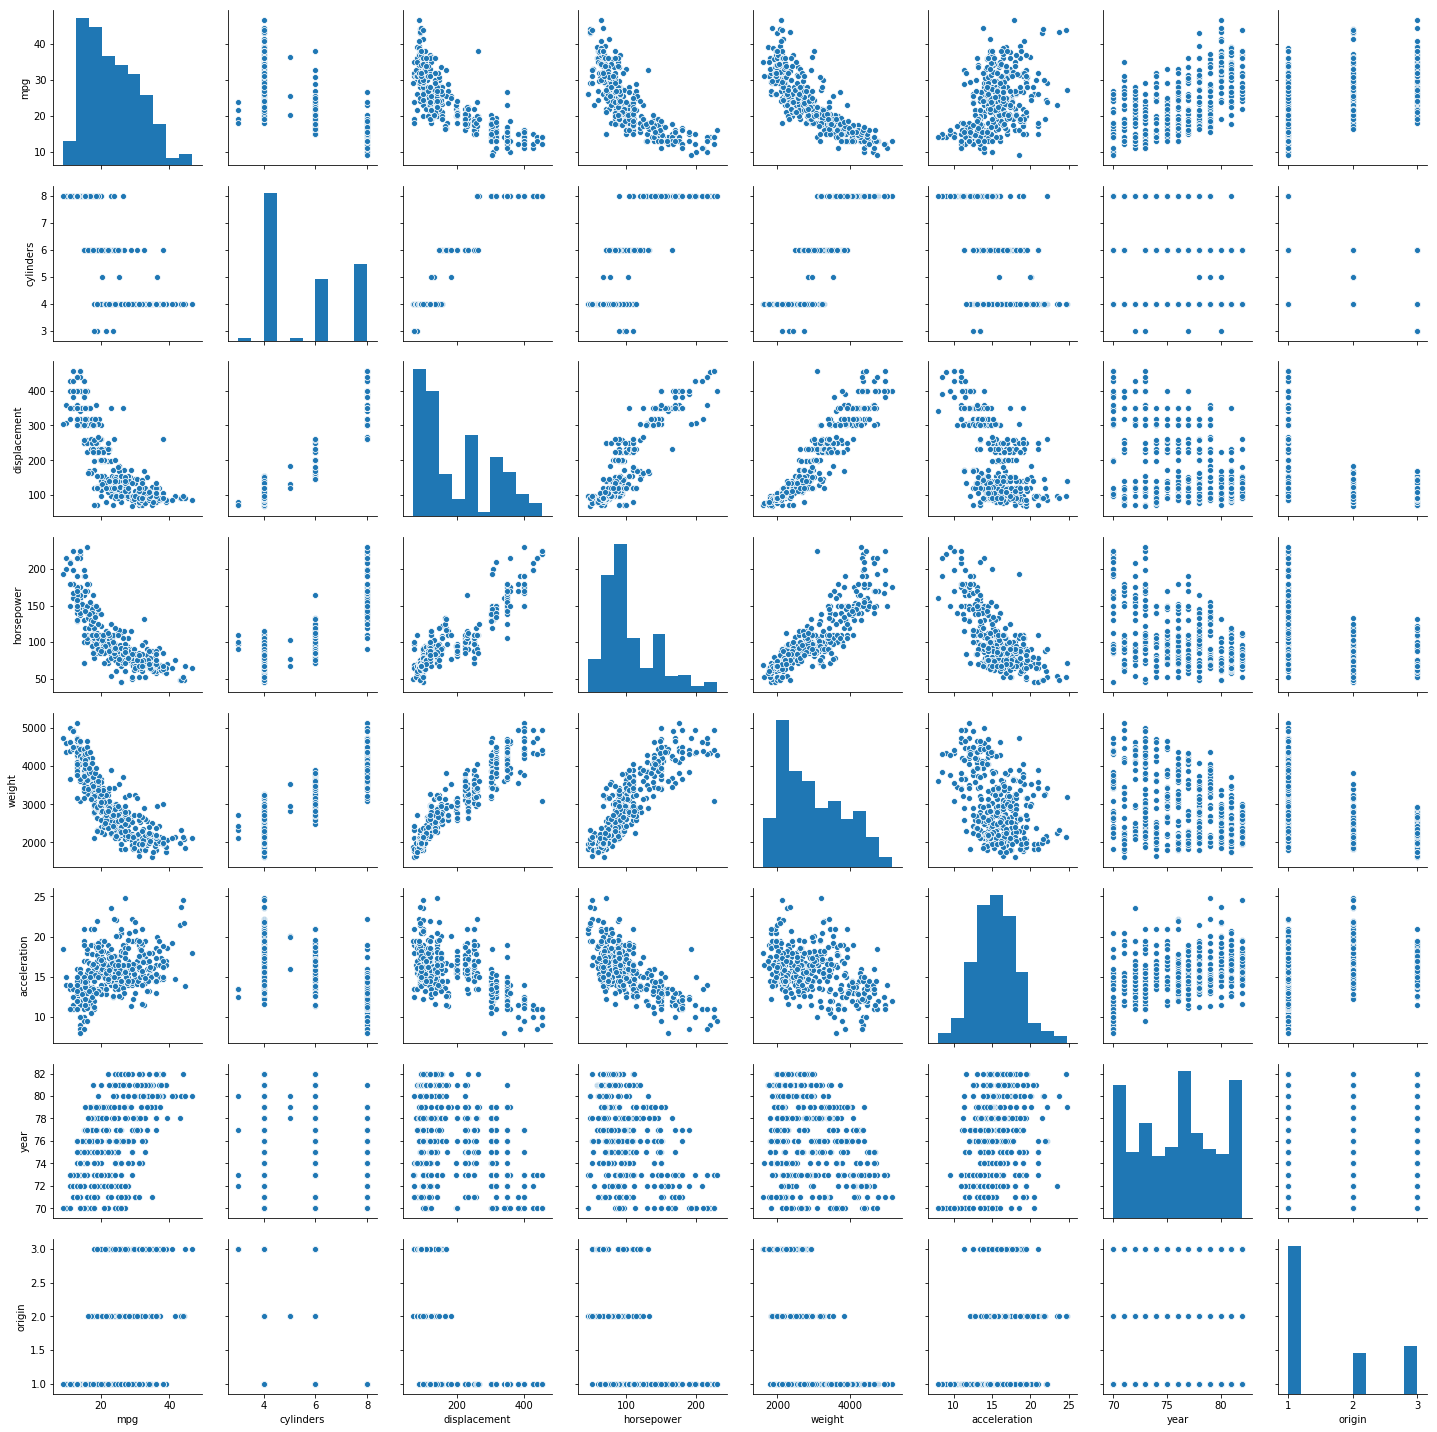

In [60]:
sns.pairplot(auto.drop(['name'],axis=1))

From the pairplot we observed that accerlate, weight, and horsepower had nonlinear relationship with mpg

## Question 10
This question uses the variables dis (the weighted mean of distances
to five Boston employment centers) and nox (nitrogen oxides concentration
in parts per 10 million) from the Boston data. We will treat
dis as the predictor and nox as the response.

(a) Fit a cubic polynomial regression to
predict nox using dis. Report the regression output, and plot
the resulting data and polynomial fits.

In [64]:
boston = pd.read_csv(dir+'boston.csv',index_col='Unnamed: 0')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


17.0